In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("..", "Resources", "heart_original_no_id.csv"))
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
#replace any number in the target field greater than 0 to 1 (1 = presence of heart disease; 0 = absence of heart disease)
df.loc[df['target']>0, 'target']=1

In [6]:
feature_dict = {}
feature_dict = {"age": "age", 
               "sex": "sex",
               "cp":"chest pain type",
               "trestbps": "resting blood pressure",
               "chol":"cholesterol",
                "fbs":"fasting blood sugar > 120mg/dl 1=true, 0=false",
                "restecg": "resting electrocardiographic results",
                "thalach": "maximum heart rate achieved",
                "exang": "exercise induced angina 1=yes, 0=no",
                "oldpeak": "ST depression induced by exercise relative to rest",
                "slope": "the slope of the peak exercise ST segment",
                "ca":"number of major vessels (0-4) colored by flourosopy",
                "thal":"thalium stress test result: 0 = normal; 1 = fixed defect; 2 = reversable defect"
                
               }
print(feature_dict)

{'age': 'age', 'sex': 'sex', 'cp': 'chest pain type', 'trestbps': 'resting blood pressure', 'chol': 'cholesterol', 'fbs': 'fasting blood sugar > 120mg/dl 1=true, 0=false', 'restecg': 'resting electrocardiographic results', 'thalach': 'maximum heart rate achieved', 'exang': 'exercise induced angina 1=yes, 0=no', 'oldpeak': 'ST depression induced by exercise relative to rest', 'slope': 'the slope of the peak exercise ST segment', 'ca': 'number of major vessels (0-4) colored by flourosopy', 'thal': 'thalium stress test result: 0 = normal; 1 = fixed defect; 2 = reversable defect'}


In [7]:
target = df["target"]
target_names = ["negative", "positive"]
print(target_names)

['negative', 'positive']


In [8]:
data = df.drop("target", axis=1)
feature_names = data.columns
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


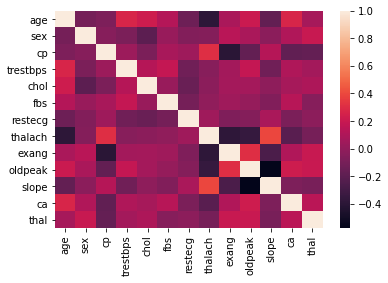

In [9]:
import seaborn as sns
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.autoscale()

In [10]:
iris = sns.load_dataset("iris")
iris



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


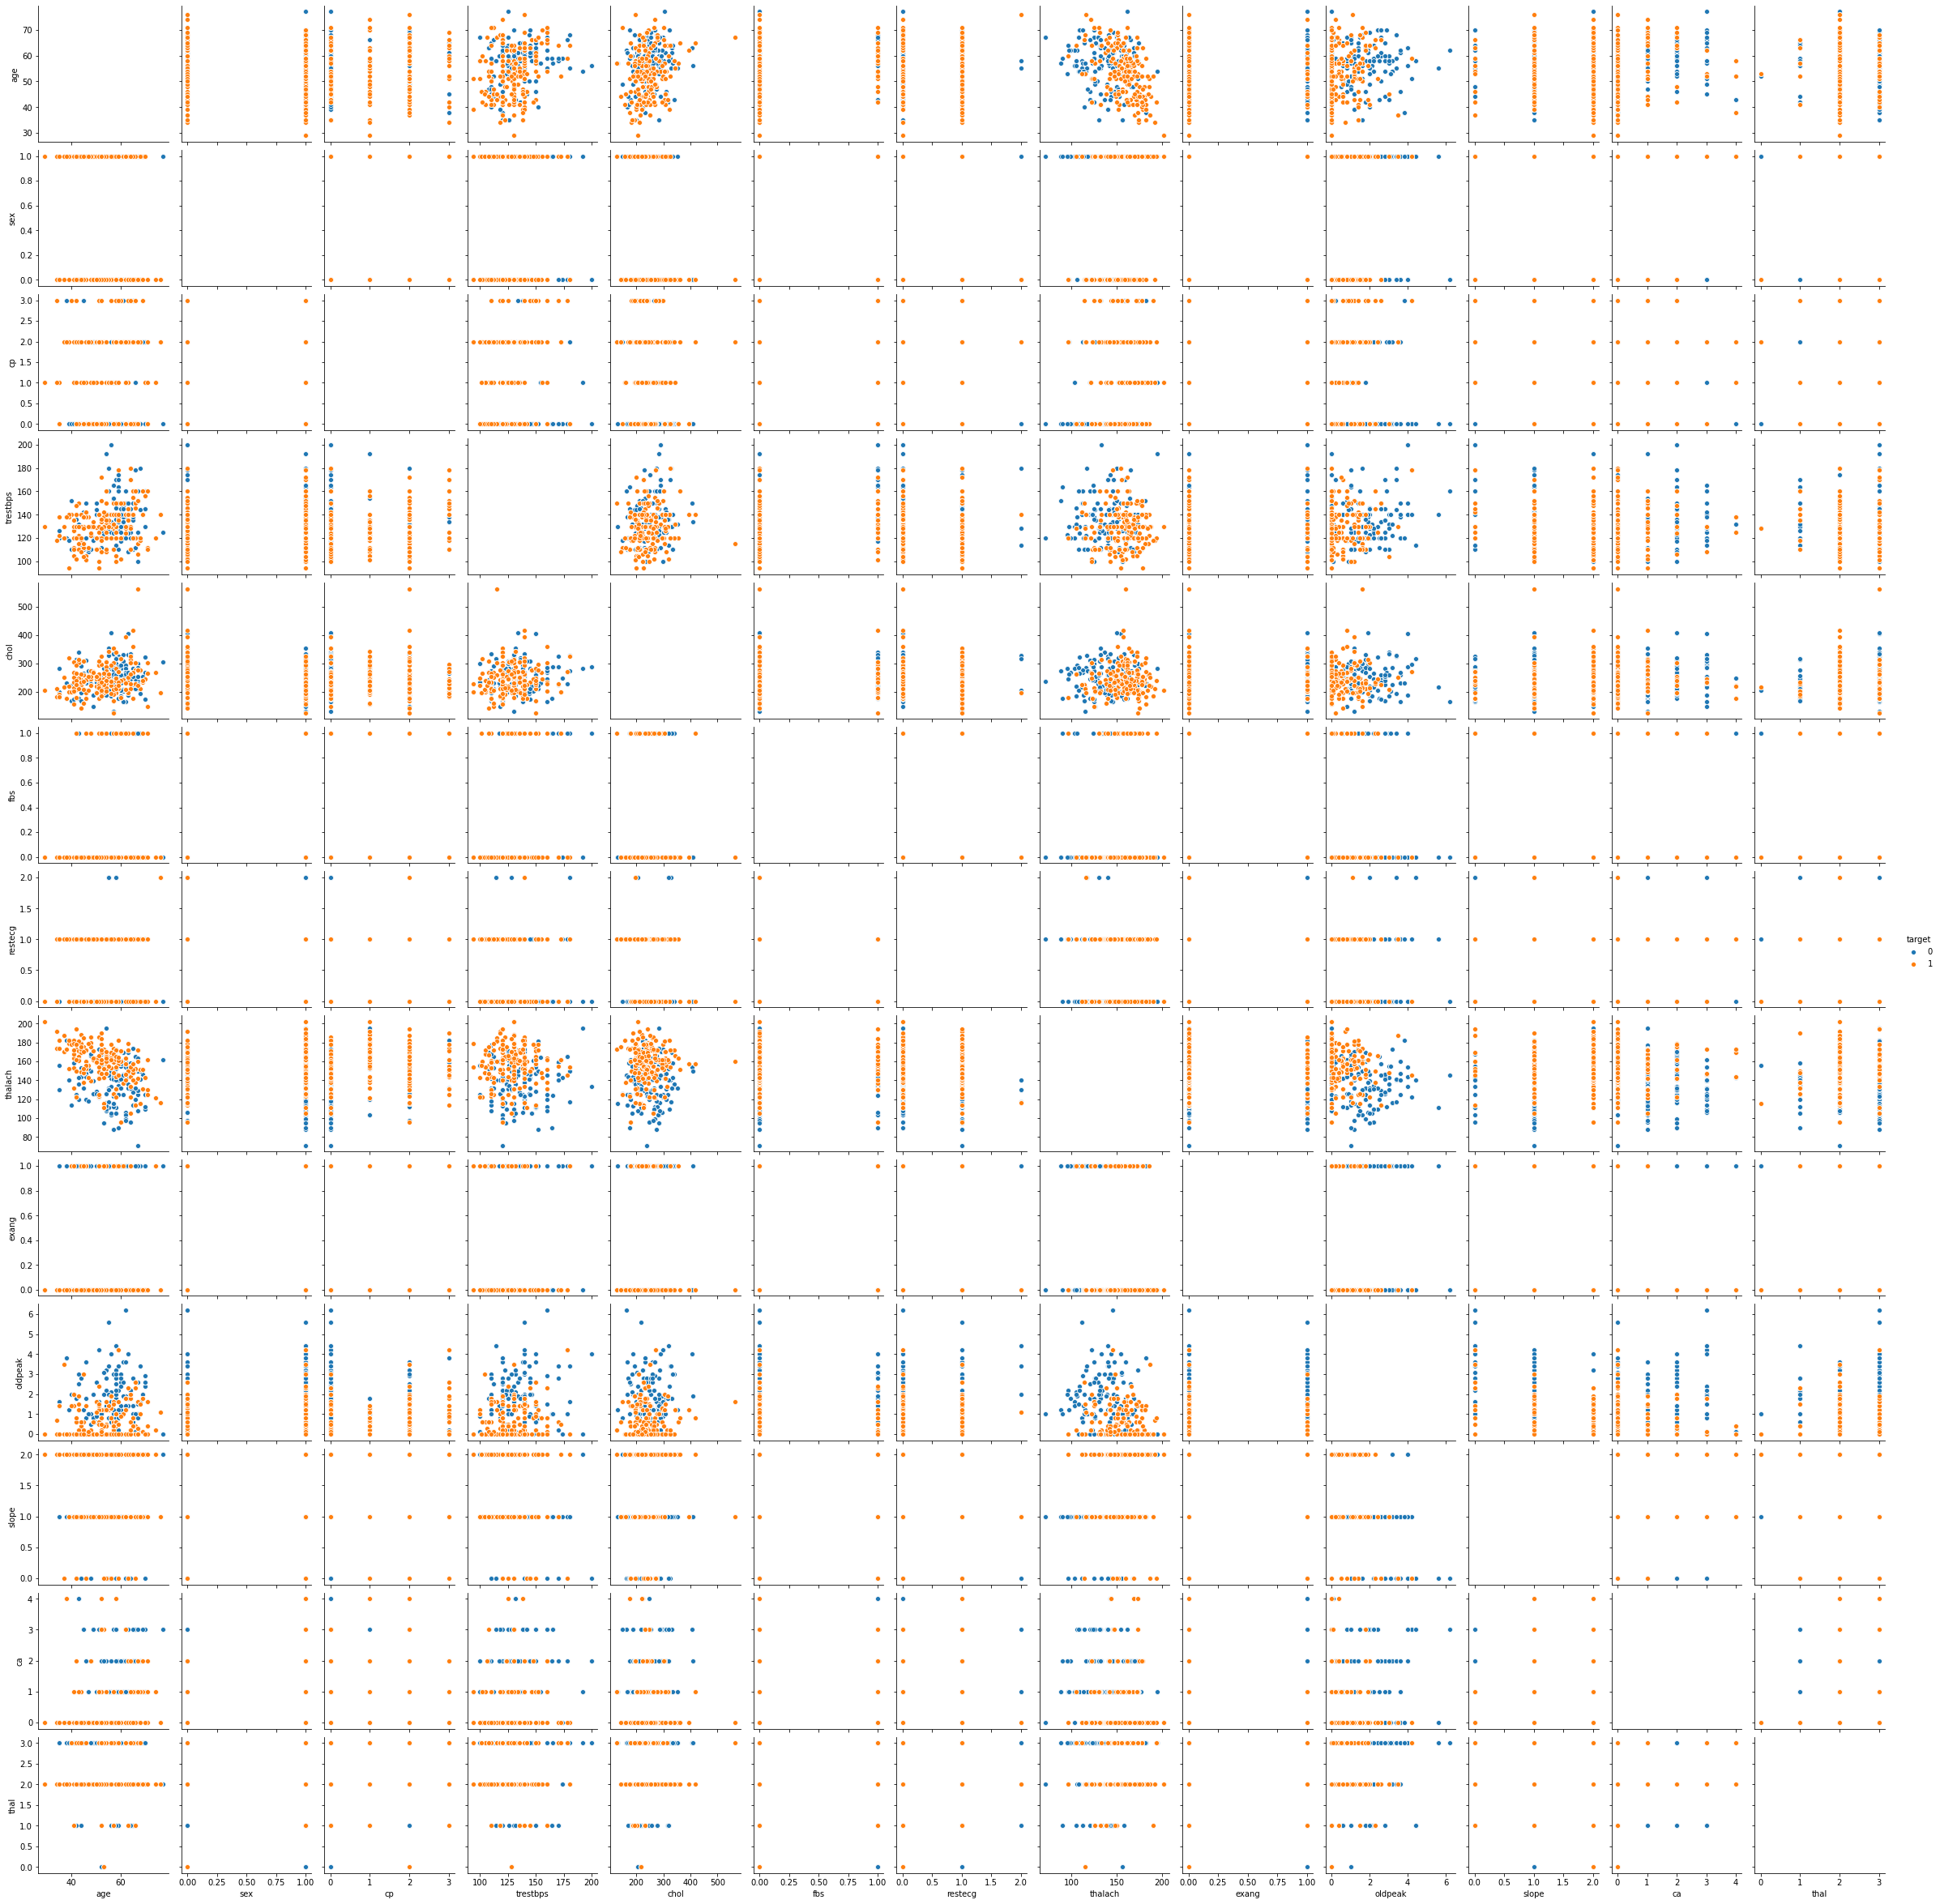

In [11]:
g = sns.PairGrid(df, hue="target")
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [12]:
data['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

(array([578.,   0., 226.,   0.,   0., 134.,   0.,  69.,   0.,  18.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

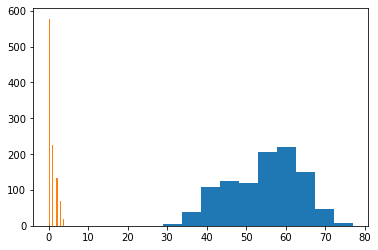

In [13]:
#histograms of each of the independent variables age through thal
#import plt

plt.hist(data['age'])
plt.hist(data['ca'])

In [14]:
#drop correlated variables
#data = data.drop("age", axis=1)
#feature_names = data.columns


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print(X_test)
print(y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
527   62    0   0       124   209    0        1      163      0      0.0   
359   53    0   2       128   216    0        0      115      0      0.0   
447   55    1   0       160   289    0        0      145      1      0.8   
31    50    0   1       120   244    0        1      162      0      1.1   
621   48    1   0       130   256    1        0      150      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
940   57    0   0       140   241    0        1      123      1      0.2   
787   51    1   0       140   298    0        1      122      1      4.2   
926   54    1   0       110   206    0        0      108      1      0.0   
249   42    1   2       130   180    0        1      150      0      0.0   
552   43    0   0       132   341    1        0      136      1      3.0   

     slope  ca  thal  
527      2   0     2  
359      2   0     0  
447      1   1    

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9766536964980544

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9766536964980544

In [18]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12945099406040117, 'thal'),
 (0.12425593386872696, 'cp'),
 (0.12153213534456492, 'oldpeak'),
 (0.12045281901110808, 'thalach'),
 (0.11991791002962406, 'ca'),
 (0.08395926436493606, 'age'),
 (0.07632796803567889, 'chol'),
 (0.07162801591645405, 'trestbps'),
 (0.05082458898228039, 'slope'),
 (0.04026369888552529, 'exang'),
 (0.034134575678007054, 'sex'),
 (0.018698921223964465, 'restecg'),
 (0.008553174598728617, 'fbs')]

In [19]:
# Model Accuracy
print('Test Acc: %.3f' % rf.score(X_test, y_test))  
# Calculate classification report
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print(predictions)


Test Acc: 0.977
[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0]


In [20]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
527   62    0   0       124   209    0        1      163      0      0.0   
359   53    0   2       128   216    0        0      115      0      0.0   
447   55    1   0       160   289    0        0      145      1      0.8   
31    50    0   1       120   244    0        1      162      0      1.1   
621   48    1   0       130   256    1        0      150      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
940   57    0   0       140   241    0        1      123      1      0.2   
787   51    1   0       140   298    0        1      122      1      4.2   
926   54    1   0       110   206    0        0      108      1      0.0   
249   42    1   2       130   180    0        1      150      0      0.0   
552   43    0   0       132   341    1        0      136      1      3.0   

     slope  ca  thal  
527      2   0     2  
359      2   0     0  
447      1   1    

In [21]:
table= X_test
table['Predictions']=predictions
table['Actual']=y_test
table.head(20)

<ipython-input-21-e5e0528c0acb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Predictions']=predictions
<ipython-input-21-e5e0528c0acb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Actual']=y_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predictions,Actual
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,1
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,1
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0
590,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,1
905,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0,0
737,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0,0
76,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1,1
948,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0


In [22]:
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       132
    positive       1.00      0.95      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [23]:
#use model with new data


X_new = np.array([[82, 1, 1, 154, 260, 1, 1,163, 1, 2.6, 2, 3, 3]])
new_predictions = rf.predict(X_new)
print(new_predictions)

[0]


In [24]:
import joblib
heart_model_filename = 'cristina_heart_model.sav'
joblib.dump(rf, heart_model_filename)

['cristina_heart_model.sav']